# Trabajo grupal 1
## Parte individual b) Busqueda de relación entre variables.
### Integrante: Mario Rozas

Primero, instalamos e importamos todo lo necesario.

In [1]:
!pip install pydataset 
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

     |████████████████████████████████| 15.9 MB 113 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=696298d4c3778a1af3959ea8749a6938b372f47ec8397874c4fead1ce913027e
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


## Dataset a ser utilizado: (corresponde a la base de datos de un banco)
Lo cargamos y le damos un vistazo. Los datos corresponden a los registros de los clientes del banco.

In [2]:
bank_data = pd.read_csv("BankData.csv")
display(bank_data)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,4003.0,1851,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,4277.0,2186,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,5409.0,0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,5281.0,0,8395,62


## En este caso se busca ver que condiciones influyen en que un cliente abandone el banco, por lo que se hará un análisis sobre las variables que influyen en el abandono de los clientes.

Veamos los datos de frecuencia de la variable 'Attrition_Flag', que corresponde a si el cliente sigue en el banco (Existing Customer) o abandonó el banco (Attrited Customer).

In [ ]:
display(bank_data.groupby('Attrition_Flag').size())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
dtype: int64

Se ve que de 10127 clientes, 1627 abandonaron el banco.

Para poder ver que sucede con estos clientes, se creará un dataset con solo los datos de los clientes que han abandonado.

In [3]:
data = bank_data
data = data.loc[data["Attrition_Flag"] == 'Attrited Customer']
display(data.head(10))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,1438.3,0,692,16
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,7882.0,605,704,16
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1438.3,808,705,19
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,15769.0,0,602,15
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,34516.0,0,691,15
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,2,4,2158.0,0,615,12
99,711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,2,3,5449.0,1628,836,18
127,720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,41,3,3,11669.0,2227,720,23
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,1,3,8025.0,0,673,18
144,767712558,Attrited Customer,59,M,1,College,Single,$60K - $80K,Blue,53,2,3,14979.0,0,530,10


### Para empezar el analisis, hay que bosquejar el perfil promedio del cliente que abandonó el banco. Para esto se irá viendo variable a variable los datos.

# Edad
En el caso de la edad, se verá como distribuyen los valores de esta, y además se veran datos relevantes como la media.

Se genera un histograma con la variable 'Customer_Age'.

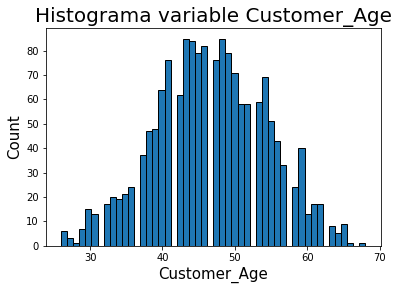

In [ ]:
tit1 = plt.title('Histograma variable Customer_Age', fontsize=20)
x1 = plt.xlabel('Customer_Age', fontsize=15)
y1 = plt.ylabel('Count', fontsize=15)
plt.figure1 = plt.hist(data["Customer_Age"], ec='black', bins=50)
plt.show()

De esto se puede ver una tendencia clara hacia edades medias, con una distribución parecida a la de tipo normal, aunque esto solo es mencionable ya que... ***

Con la función describe() se veran datos estadisticos relevantes.

In [ ]:
display(data[['Customer_Age']].describe())

,Customer_Age
count,1627.000000
mean,46.659496
std,7.665652
min,26.000000
25%,41.000000
50%,47.000000
75%,52.000000
max,68.000000


La media de edad de las personas que abandonan el banco es de 46.6594 años, con una desviación estandar de 7.665652 años, lo cual puede ayudar a generar un rango probable de personas que puedan abandonar el banco a futuro.

Además se ve que el minimo valor es de 26 años, mientras que el maximo es de 68 años, lo cual deja fuera de consideración a clientes futuros que salgan de este rango.

Se distribuiran los valores por rangos para identificar donde está la gran mayoria de clientes. Los valores del lado derecho corresponden a la frecuencia de cada rango.

In [ ]:
a = 25
rango = []
for i in range(0,10):
  rango.append(a)
  a+= 5
  #if i==5:
    #a+= 1

ranges = data.groupby(pd.cut(data['Customer_Age'], rango)).count()
display(ranges[['Customer_Age']])


,Customer_Age
Customer_Age,
"(25, 30]",32
"(30, 35]",90
"(35, 40]",220
"(40, 45]",386
"(45, 50]",393
"(50, 55]",295
"(55, 60]",153
"(60, 65]",56
"(65, 70]",2


De esto se puede sacar que entre los 40 y los 55 años está cerca del 66% de los datos, que corresponde al 10.6% de los datos totales. Ahora, este rango hay que tomarlo con cuidado, ya que por si solo no nos dice nada, pero hay que luego considerarlo. 

Ahora veremos si hay algún dato que sobresalga de los demás:

In [ ]:
display(data.groupby('Customer_Age').size().sort_values())

Customer_Age
68     1
28     1
66     1
27     3
64     5
26     6
29     7
63     8
65     9
31    13
60    13
30    15
62    17
32    17
61    17
34    19
33    20
35    21
36    24
58    24
57    33
37    37
59    40
56    43
38    47
39    48
55    51
51    58
52    58
53    59
42    62
40    64
54    69
50    71
47    76
41    76
49    79
45    79
46    82
44    84
43    85
48    85
dtype: int64

Con esto ya se ve claramente que los valores con mayor frecuencia son las edades cercanas al rango antes mencionado, por lo que este rango es valido para hacer aseveraciones.

### Con lo anterior se puede determinar que respecto a la edad, el promedio de los clientes que abandonan el banco es de 46.67 años (46-47 años), y que es más probable encontrar a alguien que abandonó en un rango etario entre 40 y 55 años.

### Con esto ultimo se puede hacer una relación: A futuro es más probable que alguien en ese rango de edad abandoné el banco que alguien que no esté dentro del rango. (Todo esto basado en los datos del banco, y con una expectativa de que todo seguirá como hasta ahora, es decir, que los clientes actuen de manera esperada)

## Ahora veamos el perfil etario de los clientes que se mantienen en el banco.
Para esto, se hará lo mismo que antes.

In [4]:
data2 = bank_data
data2 = data2.loc[data2["Attrition_Flag"] == 'Existing Customer']
display(data2.head(10))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,4010.0,1247,1088,24
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,34516.0,2264,1330,31
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,29081.0,1396,1538,36
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,22352.0,2517,1350,24
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,11656.0,1677,1441,32


Se genera un histograma con la variable 'Customer_Age'.

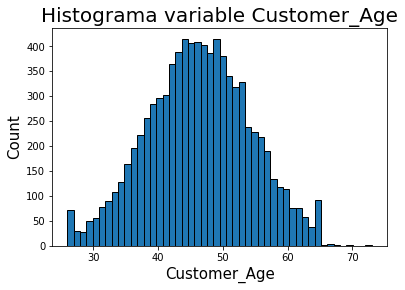

In [ ]:
tit2 = plt.title('Histograma variable Customer_Age', fontsize=20)
x2 = plt.xlabel('Customer_Age', fontsize=15)
y2 = plt.ylabel('Count', fontsize=15)
plt.figure1 = plt.hist(data2["Customer_Age"], ec='black', bins=48)
plt.show()

De esto se puede ver una tendencia clara hacia edades medias, con una distribución parecida a la de tipo normal, aunque esto solo es mencionable ya que... ***

Con la función describe() se veran datos estadisticos relevantes.

In [ ]:
display(data2[['Customer_Age']].describe())

,Customer_Age
count,8500.000000
mean,46.262118
std,8.081157
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


La media de edad de las personas que se mantienen en el banco es de 46.262118 años, con una desviación estandar de 8.081157 años. Comparativamente, el promedio es por muy poco menor de los que abandonan, y la desviación es algo mayor tambien. De esto se casa que los que se mantienen son más jovenes (aunque sea minima la diferencia), y que los datos están algo más alejados de la media, lo que se traduce en que valores fuera de edades medias tienden a quedarse en el banco.

Respecto a los valores minimos y maximos, la unica direncia es que el maximo aquí es de 73 años, aunque no influye en nada, como veremos a continuación.

Se distribuiran los valores por rangos para identificar donde está la gran mayoria de clientes. Los valores del lado derecho corresponden a la frecuencia de cada rango.

In [ ]:
a = 25
rango = []
for i in range(0,11):
  rango.append(a)
  a+= 5
  #if i==5:
    #a+= 1

ranges = data2.groupby(pd.cut(data2['Customer_Age'], rango)).count()
display(ranges[['Customer_Age']])


,Customer_Age
Customer_Age,
"(25, 30]",233
"(30, 35]",564
"(35, 40]",1258
"(40, 45]",1878
"(45, 50]",1995
"(50, 55]",1452
"(55, 60]",773
"(60, 65]",339
"(65, 70]",7


De esto se puede sacar que entre los 40 y los 55 años está cerca del 62.64% de los datos, que a su vez corresponde al 52.87844% de los datos totales. Comparativamente el primer valor es menor de los datos de los que abandonan, esto se debe a los datos de menores de 40 años, los cuales cuentan buena cantidad de datos, debido a que es más dificil que alguien que acaba de entrar al banco abandone.

Ahora veremos si hay algún dato que sobresalga de los demás:

In [ ]:
display(data2.groupby('Customer_Age').size().sort_values())

Customer_Age
73      1
68      1
66      1
70      1
67      4
28     28
27     29
64     38
29     49
30     55
63     57
26     72
61     76
62     76
31     78
32     89
65     92
33    107
60    114
59    117
34    127
58    133
35    163
57    190
36    197
56    219
37    223
55    228
54    238
38    256
39    285
40    297
41    303
52    318
53    328
51    340
42    364
50    381
48    387
43    388
47    403
45    407
46    408
49    416
44    416
dtype: int64

Con esto ya se ve claramente que los valores con mayor frecuencia son las edades cercanas al rango antes mencionado, por lo que este rango es valido para hacer aseveraciones.

### Con todo lo anterior, hay un punto a destacar, y es que el punto de conflicto está en los clientes de mediana edad, entre 40 y 55 años, ya que dentro de los datos de clientes que abandonan, cuentan con un alto porcentaje (1074 clientes, 66% de esos datos). 

### De los datos de las personas que se quedan en el banco, este grupo etario tambien cuenta con un gran número de clientes (5532 clientes, 62.64% de los datos)

### Si sumamos ambas cantidades de datos, tenemos que el total de clientes de entre 40-55 años es de 6429 personas. Con los datos, se puede aseverar que de esa cantidad, cerca de 1 a 2 personas de 10 abandonan el banco.

### Se seguirá viendo a fondo esta variable, pero se puede asegurar, al menos a ojo, que existe una relación (fuerte o debil) entre la edad y el abandono de clientes del banco

### Ahora, en necesario ver que tanto porcentaje de clientes por edad abandona el banco, con esto para saber si hay algún rango etario que está abandonando más que los demás.

Para esto, se crea un dataset con la cantidad de clientes que ha abandonado o no el banco, distribuido por edad. Además se muestran los porcentajes de abandono o retención para entender de mejor manera el comportamiento de los clientes.

Visualicemos los datos. (En este caso la edad es el valor que sale al lado izquierdo, al lado del corchete.)

In [ ]:
#Con esto se crean los rangos de edad, en este caso de 1 año cada uno 
a = 25
rango = []
for i in range(0,49):
  if a!=69 and a!=71 and a!=72:
    rango.append(a)
  a+= 1
  #if i==5:
    #a+= 1

#Datos totales
a = bank_data.groupby(pd.cut(bank_data['Customer_Age'], rango)).count()
a = a[['Customer_Age']]
a = a.rename(columns={'Customer_Age': 'Total'})

#Datos clientes que abandonaron el banco
b = data.groupby(pd.cut(data['Customer_Age'], rango)).count()
b = b[['Customer_Age']]
b = b.rename(columns={'Customer_Age': 'Abandono'})

#Datos clientes que se mantienen
c = data2.groupby(pd.cut(data2['Customer_Age'], rango)).count()
c = c[['Customer_Age']]
c = c.rename(columns={'Customer_Age': 'Sigue'})

#Unimos los datos
relacion = pd.merge(c, b, on= 'Customer_Age')
relacion = pd.merge(relacion, a, on= 'Customer_Age')

#Calculamos los porcentajes
por_abandono = relacion['Abandono']/relacion['Total']
por_abandono = por_abandono.to_frame()
por_abandono = por_abandono.rename(columns={0: '% Abandono'})

por_retencion = relacion['Sigue']/relacion['Total']
por_retencion = por_retencion.to_frame()
por_retencion = por_retencion.rename(columns={0: '% Retencion'})

#Nuevamente se unen los datos
relacion = pd.merge(relacion, por_abandono, on= 'Customer_Age')
relacion = pd.merge(relacion, por_retencion, on= 'Customer_Age')

#Se eliminan los datos
relacion = relacion.dropna()
display(relacion)

,Sigue,Abandono,Total,% Abandono,% Retencion
Customer_Age,,,,,
"(25, 26]",72,6,78,0.076923,0.923077
"(26, 27]",29,3,32,0.093750,0.906250
"(27, 28]",28,1,29,0.034483,0.965517
"(28, 29]",49,7,56,0.125000,0.875000
"(29, 30]",55,15,70,0.214286,0.785714
"(30, 31]",78,13,91,0.142857,0.857143
"(31, 32]",89,17,106,0.160377,0.839623
"(32, 33]",107,20,127,0.157480,0.842520
"(33, 34]",127,19,146,0.130137,0.869863


Aquí se pueden ver los datos, y lo más relevante son la cantidad que abandonoa y los porcentajes de abandono de los clientes por edad. Se ve que a medida que crece la edad hasta llegar a cierto punto, estos número van creciendo.

En el siguiente grafico de barras, se puede ver de mejor manera lo antes dicho.

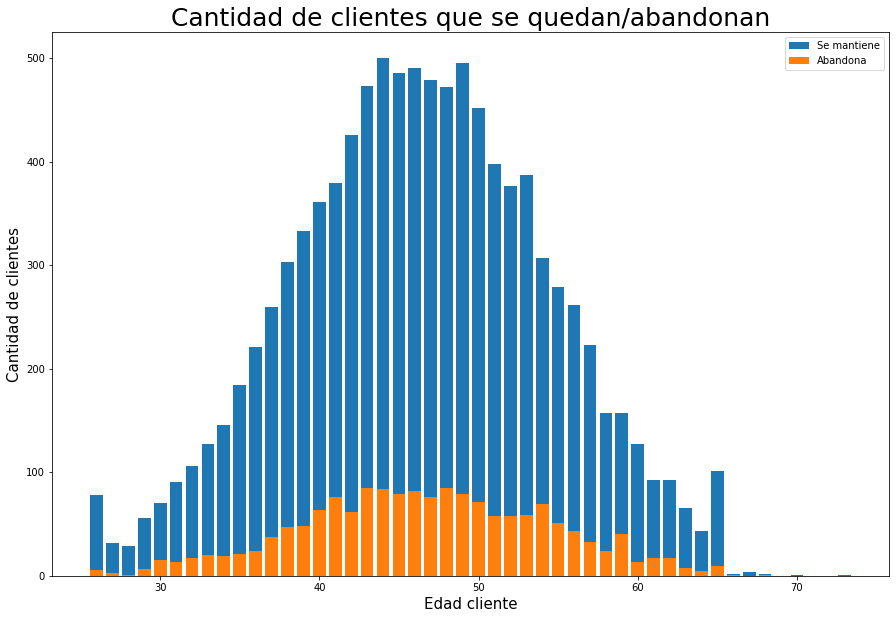

In [ ]:
#Grafico de barras
rango.remove(25)
size = plt.figure(figsize=(15, 10))
tit = plt.title("Cantidad de clientes que se quedan/abandonan", size=25)
xtit = plt.xlabel("Edad cliente", size=15)
ytit = plt.ylabel("Cantidad de clientes", size=15)
d1 = plt.bar(rango, relacion['Sigue'], bottom=relacion['Abandono'], label='Se mantiene')
d2 = plt.bar(rango, relacion['Abandono'], label = "Abandona")
plt.legend(loc='best')
plt.show()

De aquí se puede ver que claramente en edades medias el número de clientes que abandona es mayor. Aunque esto tambien puede deberse a que en estas edades existen más clientes, por lo que proporcionalmente el número aumentará sin necesariamente tener relación. Pero esto es solo una hipotesis, se debe seguir investigando con mayor profundidad.

### Con esto se comprueba que la edad si es un factor determinante para que un cliente abandone, ya que se ve a en rango de edad media, entre 40-55 años, el número de personas que son clientes del banco y lo han abandonado crece. Esto puede ser a que las personas en ese rango etario les suceden cosas en la vida que los hace tomar está decisión, o tambien puede deberse a que los clientes con estas edades son la mayoría, y por lo tanto la cantidad que se va tambien será mayor. En ambos casos se puede ver una relación directa con el abandono.

Veamos ahora otra variable para ver que otra puede tener relación con que un cliente abandone.

# Género
Aunque de este apartado no se puede sacar mucho, es interesante ver que sucede, por ejemplo, si acaso un sexo le saca mucha diferencia al otro o no.

In [ ]:
genero_aban = data[['Gender']]
display(genero_aban.describe())

,Gender
count,1627
unique,2
top,F
freq,930


### Con la función .describe(), se puede ver que dentro de los clientes que abandonaron el banco, 930 corresponde a mujeres, mientras que 697 son hombres. Esto por si solo no significa nada, sobre cuando en los datos totales tambien son mayoria las mujeres, en una proporción similar.

# Estado Civil
Al igual que el género, dificilmente se pueda sacar una relación directa con los abandonos.

Aquí se puede observar la cantidad de clientes que abandonó 

In [ ]:
#Cantidad por estado clientes que abandonaron
z = data.groupby('Marital_Status').size()
z = z.to_frame()
z = z.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
x = data2.groupby('Marital_Status').size()
x = x.to_frame()
x = x.rename(columns={0: 'Cantidad'})

#Se hace la unión
estado_civil = pd.merge(x, z, on= 'Marital_Status')
estado_civil = estado_civil.rename(columns={'Cantidad_x': 'Sigue'})
estado_civil = estado_civil.rename(columns={'Cantidad_y': 'Abandonó'})

display(estado_civil)

,Sigue,Abandonó
Marital_Status,,
Divorced,627,121
Married,3978,709
Single,3275,668
Unknown,620,129


Se generará un grafico de barras para ver esto de mejor manera.

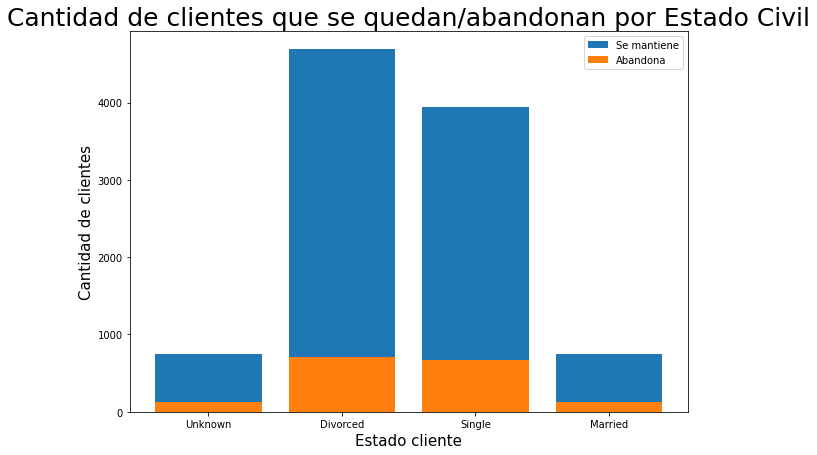

In [ ]:
#Se grafica
estados = ['Unknown', 'Divorced', 'Single', 'Married']
size2 = plt.figure(figsize=(10, 7))
tit2 = plt.title("Cantidad de clientes que se quedan/abandonan por Estado Civil", size=25)
xtit2 = plt.xlabel("Estado cliente", size=15)
ytit2 = plt.ylabel("Cantidad de clientes", size=15)
d3 = plt.bar(estados, estado_civil['Sigue'], bottom=estado_civil['Abandonó'], label='Se mantiene')
d4 = plt.bar(estados, estado_civil['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

### Se puede apreciar que la proporción es similar, por lo que a traves de solo está variable no se puede determinar una relación directa con el abandono de clientes.

# Categoría de tarjeta
A priori, está tampoco dirá mucho.

In [ ]:
#Cantidad por categoria clientes que abandonaron
c = data.groupby('Card_Category').size()
c = c.to_frame()
c = c.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
v = data2.groupby('Card_Category').size()
v = v.to_frame()
v = v.rename(columns={0: 'Cantidad'})

#Se hace la unión
card = pd.merge(v, c, on= 'Card_Category')
card = card.rename(columns={'Cantidad_x': 'Sigue'})
card = card.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_card_abandono = card['Abandonó']/(card['Abandonó']+card['Sigue'])
por_card_abandono = por_card_abandono.to_frame()
por_card_abandono = por_card_abandono.rename(columns={0: 'Porcentaje abandono'})

card = pd.merge(card, por_card_abandono, on= 'Card_Category')
display(card)

,Sigue,Abandonó,Porcentaje abandono
Card_Category,,,
Blue,7917,1519,0.160979
Gold,95,21,0.181034
Platinum,15,5,0.250000
Silver,473,82,0.147748


### Aquí sin necesidad de graficar se puede notar algo curioso, y es que a medida que mejor es la categoria de un cliente, más probababilidad tiene de abandonar el banco, aunque esto tambien puede deberse a que como son pocos datos con las categorias 'Gold' y 'Platinum' sea solo coincidencia, y esto más bien se puede ver mejor con la estancia u otras aspectos como deuda o ingreso del cliente. Con esto no se puede determinar una relación tan directa, pero si una posible relación a tener en cuenta.

# Dependencia financiera
De esta variable se puede quizas extraer algo más.

Se crea una tabla que muestra cantidades de clientes que siguen y abandonaron por cantidad de personas que dependen de ellos, además del porcentaje de abandono.

In [ ]:
#Cantidad por cantidad de dependientes de clientes que abandonaron
n = data.groupby('Dependent_count').size()
n = n.to_frame()
n = n.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
m = data2.groupby('Dependent_count').size()
m = m.to_frame()
m = m.rename(columns={0: 'Cantidad'})

#Se hace la unión
dep_count = pd.merge(m, n, on= 'Dependent_count')
dep_count = dep_count.rename(columns={'Cantidad_x': 'Sigue'})
dep_count = dep_count.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_dep_abandono = dep_count['Abandonó']/(dep_count['Abandonó']+dep_count['Sigue'])
por_dep_abandono = por_dep_abandono.to_frame()
por_dep_abandono = por_dep_abandono.rename(columns={0: 'Porcentaje abandono'})

dep_count = pd.merge(dep_count, por_dep_abandono, on= 'Dependent_count')
display(dep_count)

,Sigue,Abandonó,Porcentaje abandono
Dependent_count,,,
0,769,135,0.149336
1,1569,269,0.146355
2,2238,417,0.157062
3,2250,482,0.176428
4,1314,260,0.165184
5,360,64,0.150943


De aquí no se puede sacar mucho, los porcentajes de abandono son similares para todas las categorias. Se puede apreciar que el mayor número de clientes que abandona tiene entre 2-3 personas que dependen de ellos. Y los mayores porcentajes de abandono son de 3 y 4 personas, aunque no por mucho, pero podria llegar a ser util para establecer alguna relación.

A continuación veamos un grafico de barras los datos.

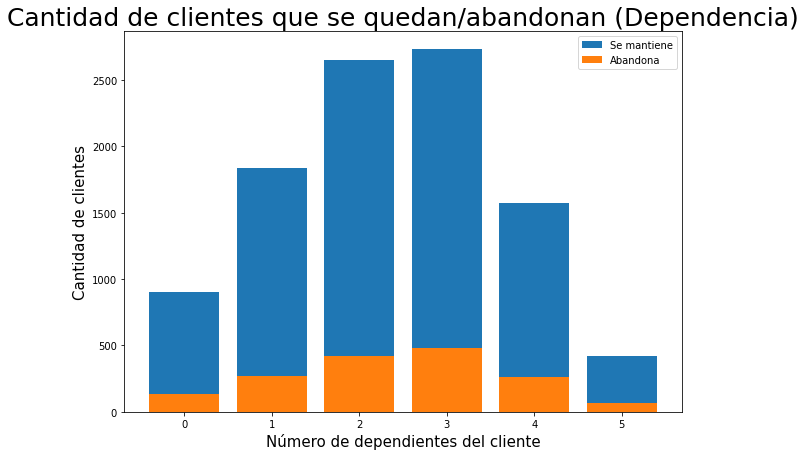

In [ ]:
nros = [0,1,2,3,4,5]
size3 = plt.figure(figsize=(10, 7))
tit3 = plt.title("Cantidad de clientes que se quedan/abandonan (Dependencia)", size=25)
xtit3 = plt.xlabel("Número de dependientes del cliente", size=15)
ytit3 = plt.ylabel("Cantidad de clientes", size=15)
d5 = plt.bar(nros, dep_count['Sigue'], bottom=dep_count['Abandonó'], label='Se mantiene')
d6 = plt.bar(nros, dep_count['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

Aquí se puede comprobar que las proporciones suelen mantenerse en temas de que a mayor cantidad, mayor es la gente que abandona, aunque esto no dice nada, ya que por una cosa estadistica tiende a ser así. Aunque algo que llama la atención es que en 3 y 4 esto no se sigue tan estrictamente, por lo que puede ser algo a considerar.

Ahora veamos los datos estadisticos de los datos de los clientes que abandonaron.

In [ ]:
display(data[['Dependent_count']].describe())

,Dependent_count
count,1627.000000
mean,2.402581
std,1.275010
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


Con esto se saca que en promedio un cliente que abandono tiene 2.4 (2-3)personas que dependen de él.

Ahora de los datos de los que se mantienen.

In [ ]:
display(data2[['Dependent_count']].describe())

,Dependent_count
count,8500.000000
mean,2.335412
std,1.303229
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


Aquí baja un poco el promedio, a 2.335 personas.

Veamos que sucede con los datos globales.

In [ ]:
display(bank_data[['Dependent_count']].describe())

,Dependent_count
count,10127.000000
mean,2.346203
std,1.298908
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


Aquí la media se acerca más a de los que se mantienen en el banco, pero sigue estando muy cerca a ambas.

### Como conclusión de esta variable, no se puede determinar una relación directa a primera vista, pero si se puede llegar a considerar debido a lo visto, por lo que hay que tenerla en consideración a futuro.

# Nivel de educación
Veamos si el nivel de eduación afecta en el abandono de los clientes.

Se seguirá el mismo procedimiento que con la variable anterior. Se crea un dataset con cantidades por nivel educativo, incluyendo los porcentajes de abandono, y luego se grafican.

In [ ]:
#Clientes que abandonan por nivel de educación
s = data.groupby('Education_Level').size()
s = s.to_frame()
s = s.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
d = data2.groupby('Education_Level').size()
d = d.to_frame()
d = d.rename(columns={0: 'Cantidad'})

#Se hace la unión
education = pd.merge(d, s, on= 'Education_Level')
education = education.rename(columns={'Cantidad_x': 'Sigue'})
education = education.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_ed_abandono = education['Abandonó']/(education['Abandonó']+education['Sigue'])
por_ed_abandono = por_ed_abandono.to_frame()
por_ed_abandono = por_ed_abandono.rename(columns={0: 'Porcentaje abandono'})

education = pd.merge(education, por_ed_abandono, on= 'Education_Level')

#Se ordena en orden de nivel educativo avanzado.
education= pd.DataFrame(education.reindex(["Unknown","Uneducated","High School","College", "Graduate", "Post-Graduate","Doctorate"]))

display(education)

,Sigue,Abandonó,Porcentaje abandono
Education_Level,,,
Unknown,1263,256,0.168532
Uneducated,1250,237,0.159381
High School,1707,306,0.152012
College,859,154,0.152024
Graduate,2641,487,0.155691
Post-Graduate,424,92,0.178295
Doctorate,356,95,0.210643


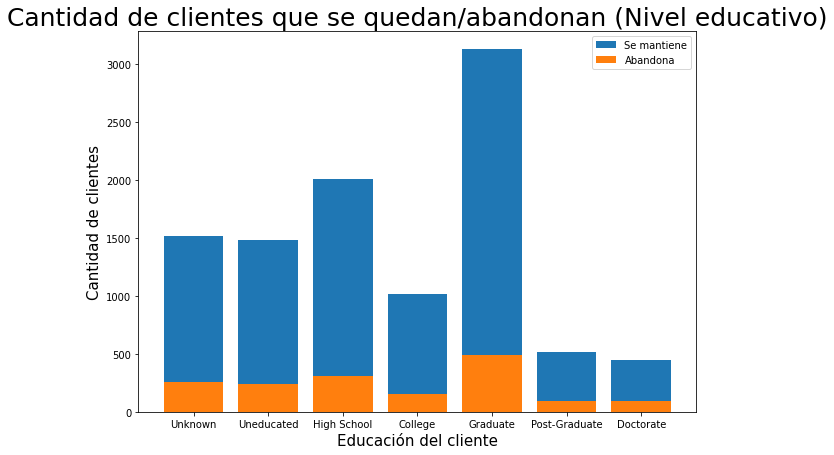

In [ ]:
nivel = ["Unknown","Uneducated","High School","College", "Graduate", "Post-Graduate","Doctorate"]
size4 = plt.figure(figsize=(10, 7))
tit4 = plt.title("Cantidad de clientes que se quedan/abandonan (Nivel educativo)", size=25)
xtit4 = plt.xlabel("Educación del cliente", size=15)
ytit4 = plt.ylabel("Cantidad de clientes", size=15)
d7 = plt.bar(nivel, education['Sigue'], bottom=education['Abandonó'], label='Se mantiene')
d8 = plt.bar(nivel, education['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

### De esto se puede notar que son los graduados ('Graduate) y los que tienen eduación 'High School' los que poseen mayor cantidad de clientes, tanto en total como que han abandonado. Lo curioso es que la mayor proporción de clientes que han abandonado respecto a los que no, se encuentra (en orden) en 'Doctorate', 'Post Graduate' y 'Unknown'. Del primero es notable ya que es el mayor nivel educativo que puede alcanzar una persona, por lo que hay que ver por que las personas de este nivel tienden a abandonar más respecto a las otras (al menos en proporción). De los 'Unknown' no se sabe nada, pero dependiendo del motivo por la que el banco no posee esta información, tambien puede haber cierta relación. Hay que tener en consideración el nivel educativo, ya que todo esto puede deberse a la distribución de datos, o que los puntos que se resaltan son meramente coincidencia debido a la poca cantidad de datos.

# Rango del salario
Esta variable tambien es interesante de analizar.

Veamos una tabla con los datos.

In [ ]:
#Clientes que abandonan por rango de salario
k = data.groupby('Income_Category').size()
k = k.to_frame()
k = k.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
l = data2.groupby('Income_Category').size()
l = l.to_frame()
l = l.rename(columns={0: 'Cantidad'})

#Se hace la unión
salario = pd.merge(l, k, on= 'Income_Category')
salario = salario.rename(columns={'Cantidad_x': 'Sigue'})
salario = salario.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_sal_abandono = salario['Abandonó']/(salario['Abandonó']+salario['Sigue'])
por_sal_abandono = por_sal_abandono.to_frame()
por_sal_abandono = por_sal_abandono.rename(columns={0: 'Porcentaje abandono'})

salario = pd.merge(salario, por_sal_abandono, on= 'Income_Category')

#Se ordena en orden de nivel educativo avanzado.
salario = pd.DataFrame(salario.reindex(["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]))

display(salario)

,Sigue,Abandonó,Porcentaje abandono
Income_Category,,,
Unknown,925,187,0.168165
Less than $40K,2949,612,0.171862
$40K - $60K,1519,271,0.151397
$60K - $80K,1213,189,0.134807
$80K - $120K,1293,242,0.157655
$120K +,601,126,0.173315


### De aquí no se puede obtener un relación directa entre el abandono de clientes y la variable, ya que las proporciones de clientes que se quedan y abandonan son parecidas por rango de salario. Solo debe tener en cuenta que los salarios que son menores a 40K y mayores a 120K tienen una mayor probabilidad de abandonar, aunque no por mucho. La gran mayoria que abandona está en el rango menor de ingresos. Dependiendo del motivo de los datos desconocidos, tambien podria implicar algo interesante, pero no se sabe.

# Relación total (productos del cliente en el banco)
No debiera ser determinante esta variable, pero igualmente se le hará un analisis.

Veamos la tabla de cantidades y el porcentaje de abandono por esta categoria.

In [ ]:
#Clientes que abandonan por número de productos
q = data.groupby('Total_Relationship_Count').size()
q = q.to_frame()
q = q.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
w = data2.groupby('Total_Relationship_Count').size()
w = w.to_frame()
w = w.rename(columns={0: 'Cantidad'})

#Se hace la unión
products = pd.merge(w, q, on= 'Total_Relationship_Count')
products = products.rename(columns={'Cantidad_x': 'Sigue'})
products = products.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_pro_abandono = products['Abandonó']/(products['Abandonó']+products['Sigue'])
por_pro_abandono = por_pro_abandono.to_frame()
por_pro_abandono = por_pro_abandono.rename(columns={0: 'Porcentaje abandono'})

products = pd.merge(products, por_pro_abandono, on= 'Total_Relationship_Count')

display(products)

,Sigue,Abandonó,Porcentaje abandono
Total_Relationship_Count,,,
1,677,233,0.256044
2,897,346,0.278359
3,1905,400,0.173536
4,1687,225,0.117678
5,1664,227,0.120042
6,1670,196,0.105038


Ahora veamos esta tabla de cantidades en un gráfico de barras, y luego lo mismo pero con el porcentaje de abandono.

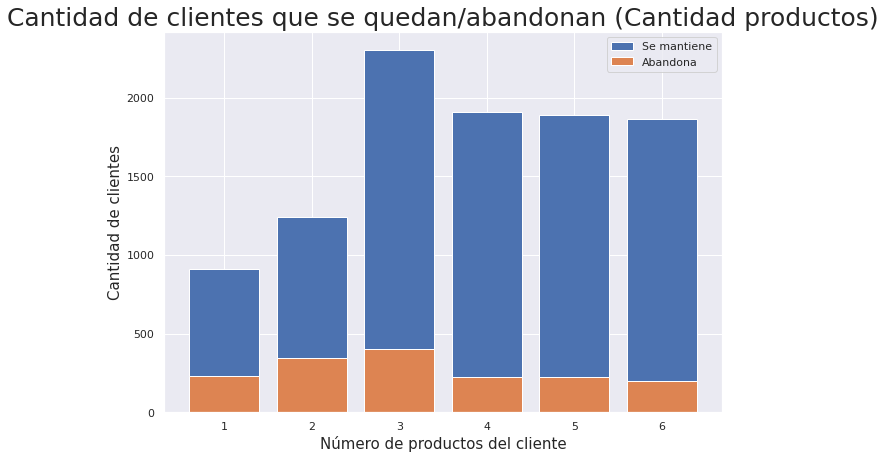

In [ ]:
prod = [1,2,3,4,5,6]
size9 = plt.figure(figsize=(10, 7))
tit9 = plt.title("Cantidad de clientes que se quedan/abandonan (Cantidad productos)", size=25)
xtit9 = plt.xlabel("Número de productos del cliente", size=15)
ytit9 = plt.ylabel("Cantidad de clientes", size=15)
d15 = plt.bar(prod, products['Sigue'], bottom=products['Abandonó'], label='Se mantiene')
d16 = plt.bar(prod, products['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

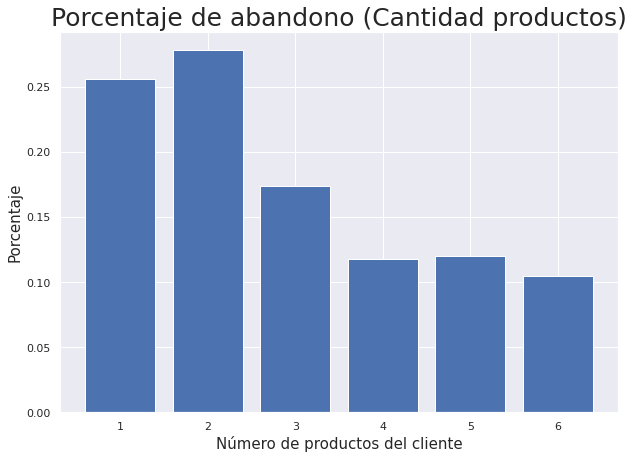

In [ ]:
size10 = plt.figure(figsize=(10, 7))
tit10 = plt.title("Porcentaje de abandono (Cantidad productos)", size=25)
xtit10 = plt.xlabel("Número de productos del cliente", size=15)
ytit10 = plt.ylabel("Porcentaje", size=15)
d16 = plt.bar(prod, products['Porcentaje abandono'])
plt.show()

### Con esto se puede ver una buena relación entre el número de productos que posee un cliente con si abandonará o no. Es má probable que un cliente abandonde mientras menos productos tenga en el banco, y esto queda demostrado con los datos y gráficos vistos. Esto es más notable cuando los clientes tienen 1 o 2 productos, ya que aquí el porcentaje de abandono es mucho mayor al resto.

# Meses en el libro y Meses inactivos
Ambas variables a priori deben tener una relación con el abandono de un cliente

Primero veamos cada una por separado. (1ro meses en el libro y luego meses inactivos. Por ultimo ambas)

A continuación se ve la cantidad de clientes que sigue o abandonó por número de meses de estancia, juntos con el porcentajes de abandono.

In [ ]:
#Clientes que abandonan por meses que el cliente lleva en el banco
f = data.groupby('Months_on_book').size()
f = f.to_frame()
f = f.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
g = data2.groupby('Months_on_book').size()
g = g.to_frame()
g = g.rename(columns={0: 'Cantidad'})

#Se hace la unión
monthbook = pd.merge(g, f, on= 'Months_on_book')
monthbook = monthbook.rename(columns={'Cantidad_x': 'Sigue'})
monthbook = monthbook.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_monbook_abandono = monthbook['Abandonó']/(monthbook['Abandonó']+monthbook['Sigue'])
por_monbook_abandono = por_monbook_abandono.to_frame()
por_monbook_abandono = por_monbook_abandono.rename(columns={0: 'Porcentaje abandono'})

monthbook = pd.merge(monthbook, por_monbook_abandono, on= 'Months_on_book')

display(monthbook)

,Sigue,Abandonó,Porcentaje abandono
Months_on_book,,,
13,63,7,0.100000
14,15,1,0.062500
15,25,9,0.264706
16,26,3,0.103448
17,35,4,0.102564
18,45,13,0.224138
19,57,6,0.095238
20,61,13,0.175676
21,73,10,0.120482


Para entender mejor la gran cantidad de datos, se verá un gráfico de barras de esto, tanto cantidad de clientes por mes, como porcentajes de abandono.

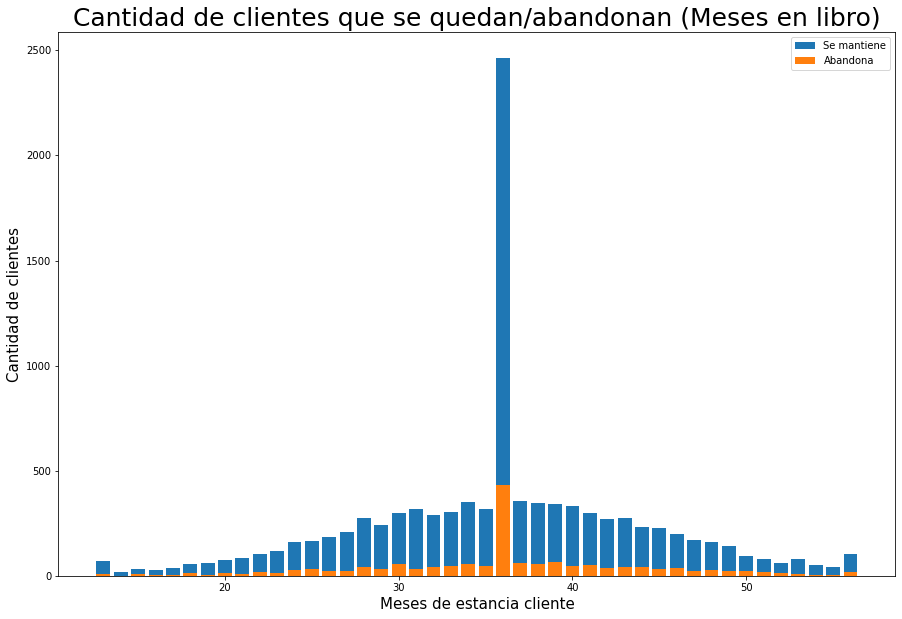

In [ ]:
a = 13
meses = []
for i in range(0,44):
  meses.append(a)
  a+=1

size5 = plt.figure(figsize=(15, 10))
tit5 = plt.title("Cantidad de clientes que se quedan/abandonan (Meses en libro)", size=25)
xtit5 = plt.xlabel("Meses de estancia cliente", size=15)
ytit5 = plt.ylabel("Cantidad de clientes", size=15)
d9 = plt.bar(meses, monthbook['Sigue'], bottom = monthbook['Abandonó'], label='Se mantiene')
d10 = plt.bar(meses, monthbook['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

Aquí se puede ver que la variable sigue una distribución parecida a la normal, por lo que los datos tienden a estar cerca del medio (entre 25 y 45 meses más o menos). Aquí se ve que hay un dato que sobresale bastante, que son los clientes con 36 meses de estancia, por lo que como consecuencia los clientes que abandonaron serán mayores en esa instancia.

Para ver con mayor profundidad estos datos, veamos un gráfico de barras de los porcentajes de abandono por meses de estancia.

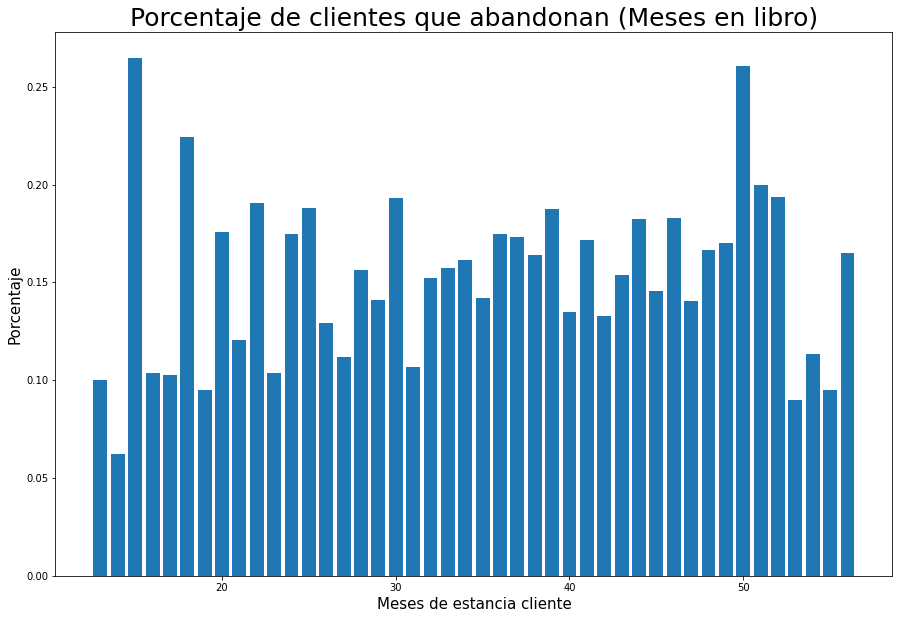

In [ ]:
size6 = plt.figure(figsize=(15, 10))
tit6 = plt.title("Porcentaje de clientes que abandonan (Meses en libro)", size=25)
xtit6 = plt.xlabel("Meses de estancia cliente", size=15)
ytit6 = plt.ylabel("Porcentaje", size=15)
d11 = plt.bar(meses, monthbook['Porcentaje abandono'])
plt.show()

Aquí los datos se ven bastante irregulares y cercanos, pero se puede ver que entre los 31 y 52 meses los valores se empiezan a estabilizar de mayor manera, por lo que se puede apreciar una pequeña relación, a la cual hay que prestarle atención.

Ahora, veamos datos estadisticos de los que han abandonado el banco.

In [ ]:
#Clientes que abandonaron
display(data[['Months_on_book']].describe())

,Months_on_book
count,1627.000000
mean,36.178242
std,7.796548
min,13.000000
25%,32.000000
50%,36.000000
75%,40.000000
max,56.000000


De aquí no se puede sacar nada, ya que el dato de los clientes de 36 meses afecta notablemente la tabla anterior. Lo unico que puede especificarse en que en promedio los clientes que abandonan tienen una antiguedad de 36 meses en el banco, y que la mayoria de los datos está entre 32 y 40 meses, por lo que estos rangos son relevantes para seguir observando.

### Por si sola está variable no dice nada, pero como con las anteriores, debe ser tomada en cuenta.

### Ahora hagamos lo mismo pero con los meses inactivos
Primero la tabla de datos, con los porcentajes de abandono, y luego sus respectivos graficos.

In [ ]:
#Clientes que abandonan por meses inactivo que el cliente lleva en el banco
h = data.groupby('Months_Inactive_12_mon').size()
h = h.to_frame()
h = h.rename(columns={0: 'Cantidad'})

#Clientes que se mantienen
j = data2.groupby('Months_Inactive_12_mon').size()
j = j.to_frame()
j = j.rename(columns={0: 'Cantidad'})

#Se hace la unión
monthinac = pd.merge(j, h, on= 'Months_Inactive_12_mon')
monthinac = monthinac.rename(columns={'Cantidad_x': 'Sigue'})
monthinac = monthinac.rename(columns={'Cantidad_y': 'Abandonó'})

#Para ver el porcentaje de abandono
por_moninac_abandono = monthinac['Abandonó']/(monthinac['Abandonó']+monthinac['Sigue'])
por_moninac_abandono = por_moninac_abandono.to_frame()
por_moninac_abandono = por_moninac_abandono.rename(columns={0: 'Porcentaje abandono'})

monthinac = pd.merge(monthinac, por_moninac_abandono, on= 'Months_Inactive_12_mon')

display(monthinac)

,Sigue,Abandonó,Porcentaje abandono
Months_Inactive_12_mon,,,
0,14,15,0.517241
1,2133,100,0.044783
2,2777,505,0.153870
3,3020,826,0.214769
4,305,130,0.298851
5,146,32,0.179775
6,105,19,0.153226


De aquí se puede apreciar que la gran mayorita de los que abandona tienen 2 o 3 meses de inactividad. A esto hay que sumarle que los que tienen 4 y 3 meses sin actividad tienen los mayores porcentajes de abandono, esto sin contar el mes 0, ya que al ser tan pocos valores, no se puede tomar tan en consideración, ya que puede ser casualidad, pero igual será tomado en cuenta.

En el siguiente gráfico de barras se pueden ver mejor los datos, y se puede comprobar lo antes dicho.

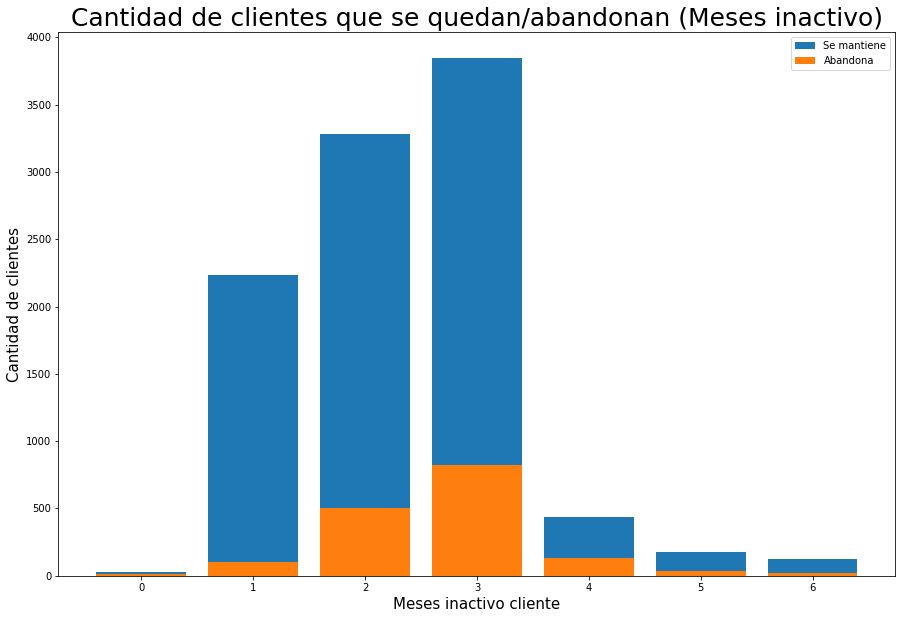

In [ ]:
meses2 = [0,1,2,3,4,5,6]

size7 = plt.figure(figsize=(15, 10))
tit7 = plt.title("Cantidad de clientes que se quedan/abandonan (Meses inactivo)", size=25)
xtit7 = plt.xlabel("Meses inactivo cliente", size=15)
ytit7 = plt.ylabel("Cantidad de clientes", size=15)
d12 = plt.bar(meses2, monthinac['Sigue'], bottom = monthinac['Abandonó'], label='Se mantiene')
d13 = plt.bar(meses2, monthinac['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

Gráfico de barras de los porcentajes de abandono.

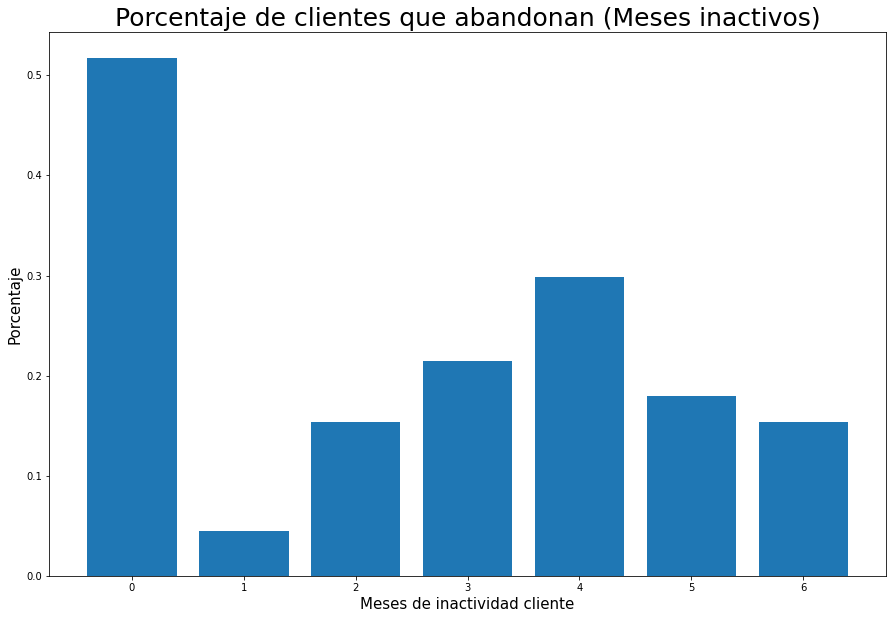

In [ ]:
size8 = plt.figure(figsize=(15, 10))
tit8 = plt.title("Porcentaje de clientes que abandonan (Meses inactivos)", size=25)
xtit8 = plt.xlabel("Meses de inactividad cliente", size=15)
ytit8 = plt.ylabel("Porcentaje", size=15)
d14 = plt.bar(meses2, monthinac['Porcentaje abandono'])
plt.show()

### Se puede corroborar que mientras más cerca se está de 4 meses de inactividad, mayor es la probabilidad de que el cliente abandone, siendo 3 un mes decisivo ya que aquí se encuentra la mayor cantidad de clientes. Se ve una relación directa con el abandono

Ahora veamos datos estadisticos para caracterizar a los clientes en esta variable.

In [ ]:
#Clientes que abandonaron
display(data[['Months_Inactive_12_mon']].describe())

,Months_Inactive_12_mon
count,1627.000000
mean,2.693301
std,0.899623
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,6.000000


In [ ]:
#Clientes que siguen
display(data2[['Months_Inactive_12_mon']].describe())

,Months_Inactive_12_mon
count,8500.000000
mean,2.273765
std,1.016741
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


La media de los clientes que han abandonado el banco es de 2.693 meses de inactividad, es decir aproximadamente 3 meses, mientras que los que siguen en el banco el promedio es de 2.27 meses, lo cual es más bajo que los primeros.

De esto se traduce, que mientras más meses se ha estado inactivo en los ultimos 12 meses, más probable es que el cliente haya abandonado el banco, sobretodo si ha estado entre 3 y 5 meses inactivos.

Ahora veamos si existe alguna relación entre ambas variables, y si esto a su vez tiene relación directa. Para esto se hará un grafico de dispersión con eje x: 'Meses inactivo' y eje y: 'Meses en libro'.

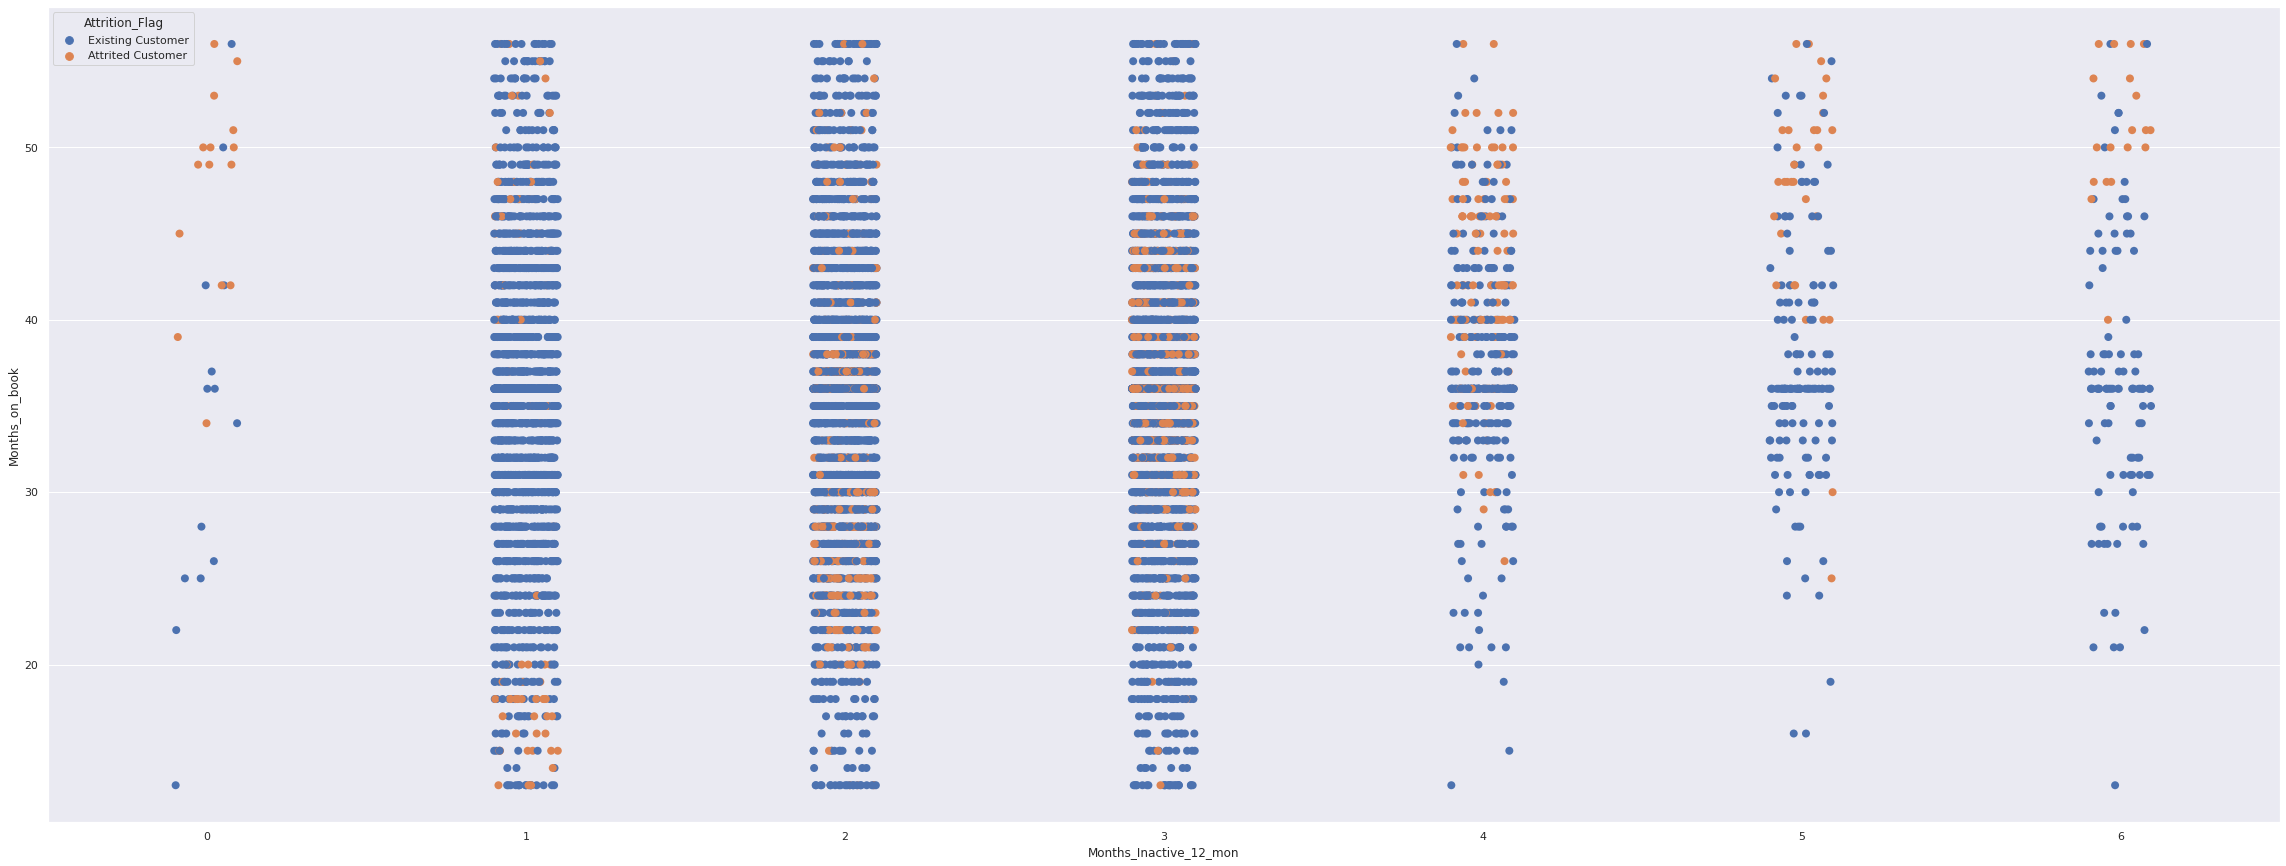

In [ ]:
#Se hace el grafico
tam = sns.set(rc = {'figure.figsize':(40,15)})
ax = sns.stripplot(x="Months_Inactive_12_mon", y="Months_on_book", hue="Attrition_Flag", data=bank_data, size = 8, alpha = 1)
display(ax)

### Con esto se puede observar que existe una relación entre ambas variables.
Cuando una persona lleva 1 mes inactiva, es más probable que abandone si lleva poco tiempo en el banco (menos de 20 meses).

Cuando una persona lleva 2 meses inactiva, es más probable que abandone si lleva entre 20 a 30 meses.

Si una persona lleva 3 meses inactiva, es más probable que se vaya del banco si lleva aproximadamente entre 30 y 40 meses en este.

Si una persona lleva 4 meses inactiva, es más probable si que abandonde si lleva más de 40 meses en el banco. Lo mismo con 5 y 6 meses de inactividad.


# Cupo total de credito y cupo utilizado aún no pagado

Primero veamos cada una por separado y luego juntas para ver si existen una relación más potente.

Primero, los datos del cupo total de credito.

Veamos la tabla de datos.

In [37]:
#Ciclo para poder definir lista con rangos 
a = 0
rangos = []
for i in range(0,36):
  rangos.append(a)
  a+= 1000
  #if i==34:
    #a+= 100

#Agrupamos por rango de los datos de clientes que han abandonado
ranges = data.groupby(pd.cut(data['Credit_Limit'], rangos)).count()
creditlim_aban = ranges[['Credit_Limit']]
creditlim_aban = creditlim_aban.rename(columns={'Credit_Limit': 'Abandonó'})

#Ahora de los que siguen
ranges2 = data2.groupby(pd.cut(data2['Credit_Limit'], rangos)).count()
creditlim_sigue = ranges2[['Credit_Limit']]
creditlim_sigue = creditlim_sigue.rename(columns={'Credit_Limit': 'Sigue'})

#Unimos
creditlim = pd.merge(creditlim_sigue, creditlim_aban, on= 'Credit_Limit')

#Para ver el porcentaje de abandono
por_creditlim_abandono = creditlim['Abandonó']/(creditlim['Abandonó']+creditlim['Sigue'])
por_creditlim_abandono = por_creditlim_abandono.to_frame()
por_creditlim_abandono = por_creditlim_abandono.rename(columns={0: 'Porcentaje abandono'})

#Unimos
creditlim = pd.merge(creditlim, por_creditlim_abandono, on= 'Credit_Limit')
creditlim = creditlim.dropna()

display(creditlim)

,Sigue,Abandonó,Porcentaje abandono
Credit_Limit,,,
"(1000, 2000]",1029,378,0.268657
"(2000, 3000]",1804,228,0.112205
"(3000, 4000]",1023,176,0.146789
"(4000, 5000]",577,144,0.199723
"(5000, 6000]",493,80,0.139616
"(6000, 7000]",355,56,0.136253
"(7000, 8000]",317,59,0.156915
"(8000, 9000]",281,61,0.178363
"(9000, 10000]",266,46,0.147436


Al ser tantos datos, no se puede sacar mucho a simple vista. Por lo que serán graficados los datos.

Grafico de barras de los 2 primeros apartados.

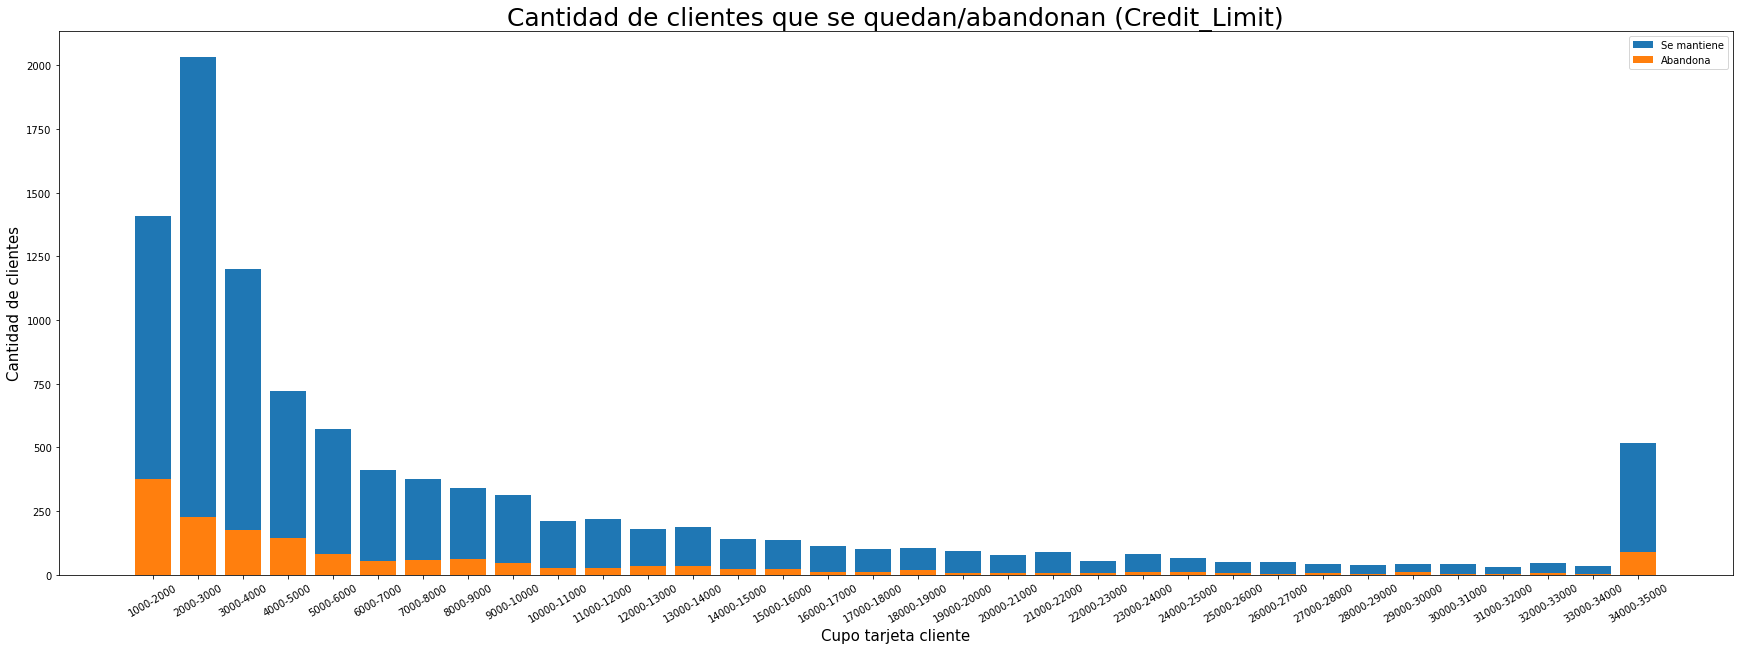

In [41]:
#Graficamos
ejex = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000', '30000-31000', '31000-32000', '32000-33000', '33000-34000', '34000-35000']

size11 = plt.figure(figsize=(30, 10))
plt.xticks(range(len(ejex)),('1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000', '30000-31000', '31000-32000', '32000-33000', '33000-34000', '34000-35000'), rotation=30)
tit11 = plt.title("Cantidad de clientes que se quedan/abandonan (Credit_Limit)", size=25)
xtit11 = plt.xlabel("Cupo tarjeta cliente", size=15)
ytit11 = plt.ylabel("Cantidad de clientes", size=15)
d16 = plt.bar(ejex, creditlim['Sigue'], bottom = creditlim['Abandonó'], label='Se mantiene')
d17 = plt.bar(ejex, creditlim['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

De aquí se puede observar que la gran mayoria de clientes que han abandonado tienen un cupo bajo en la tarjeta (menor a 10000), pero sigue una proporción parecida a la de los clientes que se mantienen.

Veamos ahora el grafico de barras de los porcentajes de abandono.

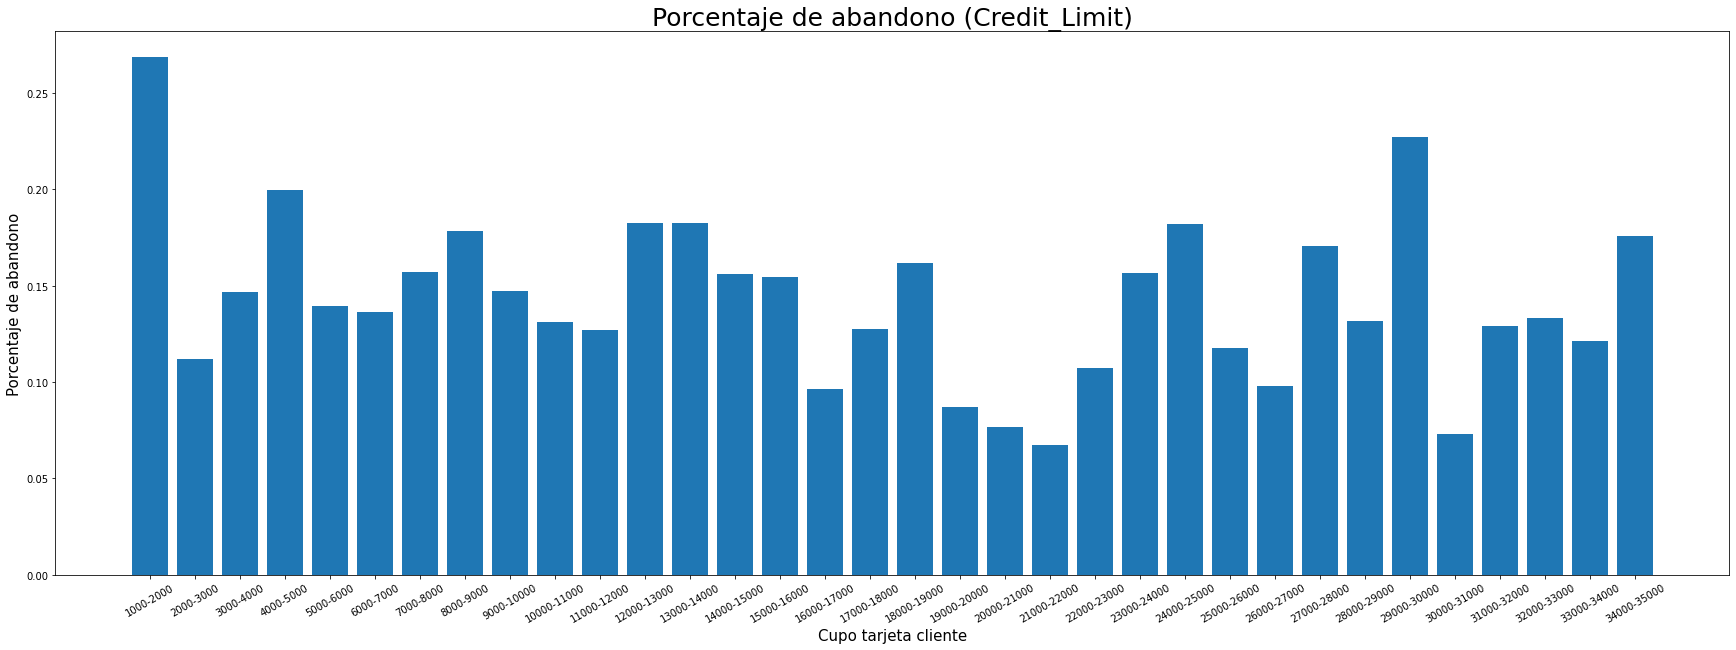

In [42]:
#Graficamos
size12 = plt.figure(figsize=(30, 10))
plt.xticks(range(len(ejex)),('1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000', '30000-31000', '31000-32000', '32000-33000', '33000-34000', '34000-35000'), rotation=30)
tit12 = plt.title("Porcentajes de abandono (Credit_Limit)", size=25)
xtit12 = plt.xlabel("Cupo tarjeta cliente", size=15)
ytit12 = plt.ylabel("Porcentaje de abandono", size=15)
d18 = plt.bar(ejex, creditlim['Porcentaje abandono'])
plt.show()

### Aquí se puede ver que los datos son algo inestables, pero que en los rangos bajos suele estabilizarse de manera mayor, y coincidentemente aquí están la mayoria de datos, por lo que se ve una relación con el abandono. Esto es que a medida que un cliente tiene menor cupo en la tarjeta, mayor es la probabilidad de que abandone el banco.

Veamos los datos estadisticos. Primero de los que han abandonado y luego de los que siguen en el banco.



In [60]:
display(data[['Credit_Limit']].describe())

,Credit_Limit
count,1627.000000
mean,8136.039459
std,9095.334105
min,1438.300000
25%,2114.000000
50%,4178.000000
75%,9933.500000
max,34516.000000


In [61]:
display(data2[['Credit_Limit']].describe())

,Credit_Limit
count,8500.000000
mean,8726.877518
std,9084.969807
min,1438.300000
25%,2602.000000
50%,4643.500000
75%,11252.750000
max,34516.000000


Aquí se puede comprobar que la media de cupo total de crédito de los clientes que abandonan es notablemente más baja que los que continuan en el banco, lo que demuestra que los que abandonan suelen tener un cupo más bajo.

Ahora veamos la otra variable, la de cupo utilizado aún no pagado. 

Tabla de datos.

In [52]:
#Ciclo para poder definir lista con rangos 
a = 0
rango2 = []
for i in range(0,10):
  rango2.append(a)
  a+= 300

#Agrupamos por rango de los datos de clientes que han abandonado
ranges3 = data.groupby(pd.cut(data['Total_Revolving_Bal'], rango2)).count()
creditbal_aban = ranges3[['Total_Revolving_Bal']]
creditbal_aban = creditbal_aban.rename(columns={'Total_Revolving_Bal': 'Abandonó'})


#Ahora de los que siguen
ranges4 = data2.groupby(pd.cut(data2['Total_Revolving_Bal'], rango2)).count()
creditbal_sigue = ranges4[['Total_Revolving_Bal']]
creditbal_sigue = creditbal_sigue.rename(columns={'Total_Revolving_Bal': 'Sigue'})

#Unimos
creditbal = pd.merge(creditbal_sigue, creditbal_aban, on= 'Total_Revolving_Bal')

#Para ver el porcentaje de abandono
por_creditbal_abandono = creditbal['Abandonó']/(creditbal['Abandonó']+creditbal['Sigue'])
por_creditbal_abandono = por_creditbal_abandono.to_frame()
por_creditbal_abandono = por_creditbal_abandono.rename(columns={0: 'Porcentaje abandono'})

#Unimos
creditbal = pd.merge(creditbal, por_creditbal_abandono, on= 'Total_Revolving_Bal')
creditbal = creditbal.dropna()

display(creditbal)

,Sigue,Abandonó,Porcentaje abandono
Total_Revolving_Bal,,,
"(0, 300]",0,43,1.000000
"(300, 600]",93,105,0.530303
"(600, 900]",754,86,0.102381
"(900, 1200]",1090,76,0.065180
"(1200, 1500]",1393,61,0.041953
"(1500, 1800]",1443,68,0.045003
"(1800, 2100]",1057,50,0.045167
"(2100, 2400]",588,58,0.089783
"(2400, 2700]",505,187,0.270231


Aquí se pueden ver los datos, y resaltan los porcentajes de abandono, que son muy altos en los 2 rangos más bajos, y en el rango más alto, coincidiendo con que contienen una buena cantidad de los clientes que han abandonado.

Aquí vemos un graficos de barras para ver de mejor manera los datos.

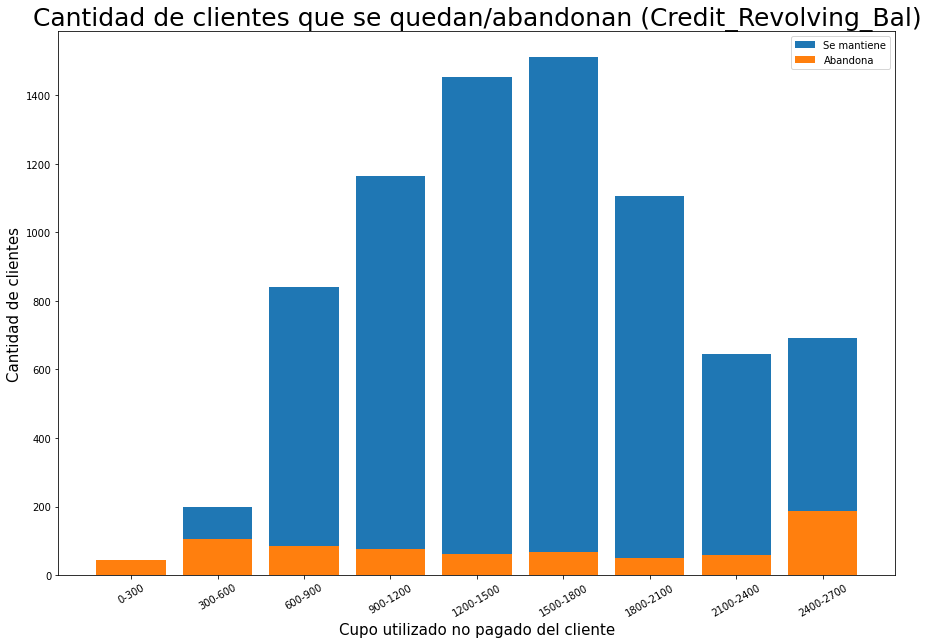

In [55]:
ejex1 = ['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', '1800-2100', '2100-2400', '2400-2700']

size13 = plt.figure(figsize=(15, 10))
plt.xticks(range(len(ejex1)),('0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', '1800-2100', '2100-2400', '2400-2700'), rotation=30)
tit13 = plt.title("Cantidad de clientes que se quedan/abandonan (Credit_Revolving_Bal)", size=25)
xtit13 = plt.xlabel("Cupo utilizado no pagado del cliente", size=15)
ytit13 = plt.ylabel("Cantidad de clientes", size=15)
d18 = plt.bar(ejex1, creditbal['Sigue'], bottom = creditbal['Abandonó'], label='Se mantiene')
d19 = plt.bar(ejex1, creditbal['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

Aquí se puede ver lo antes dicho, que los clientes que abandonan se concentran de buena manera en ambos extremos, y además constituyen un gran porcentaje del total del rango.

En el siguiente grafico de barras de porcentajes de abandono se puede comprobar.

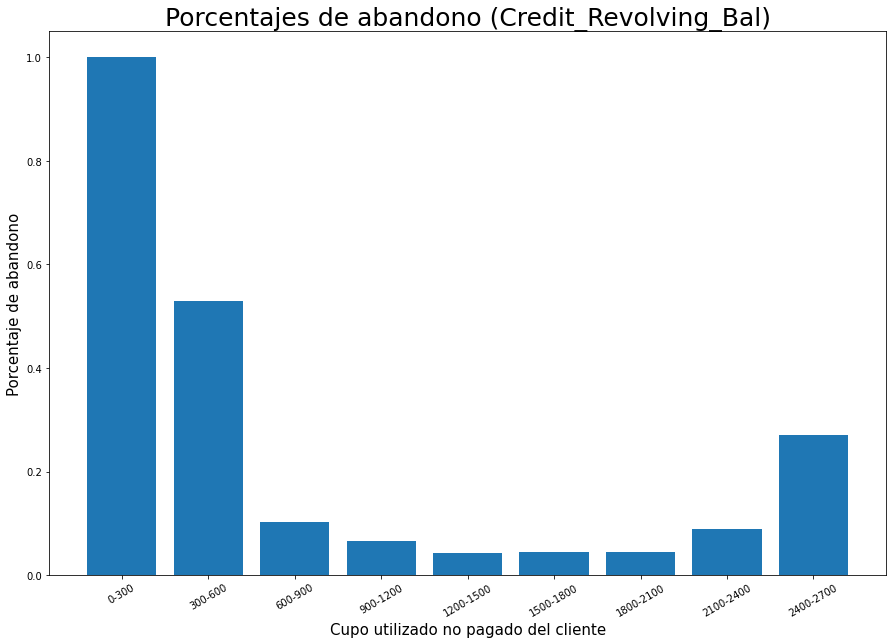

In [57]:
size14 = plt.figure(figsize=(15, 10))
plt.xticks(range(len(ejex1)),('0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', '1800-2100', '2100-2400', '2400-2700'), rotation=30)
tit14 = plt.title("Porcentajes de abandono (Credit_Revolving_Bal)", size=25)
xtit14 = plt.xlabel("Cupo utilizado no pagado del cliente", size=15)
ytit14 = plt.ylabel("Porcentaje de abandono", size=15)
d20 = plt.bar(ejex1, creditbal['Porcentaje abandono'])
plt.show()

### Con esto se puede decir que existe una relación de la variable con que los clientes abandones. Mientras menos cupo utilizado aún no pagado, mayor es la probabilidad de abandono, siendo incluso de un 100% y casi 50% en los 2 rangos más bajos, y también , mayor es la probabilidad si el cliente tiene un cupo utilizado no pagado máximo.

Ahora veamos los datos estadisticos.

In [63]:
display(data[['Total_Revolving_Bal']].describe())

,Total_Revolving_Bal
count,1627.000000
mean,672.822987
std,921.385582
min,0.000000
25%,0.000000
50%,0.000000
75%,1303.500000
max,2517.000000


In [65]:
display(data2[['Total_Revolving_Bal']].describe())

,Total_Revolving_Bal
count,8500.000000
mean,1256.604118
std,757.745354
min,0.000000
25%,800.000000
50%,1364.000000
75%,1807.000000
max,2517.000000


Al igual que en la anterior variable se puede ver que la media de los clientes que abandonan es notablemente mayor de los que se mantienen, por lo que se puede comprobar que mientras menos es el cupo utilizado no pagado, mayor es la probabilidad de que un cliente abandone.

Ahora veamos si existe una relación entre ambas y de que un cliente abandone. Para esto se genera un gráfico de dispersión de las variable.

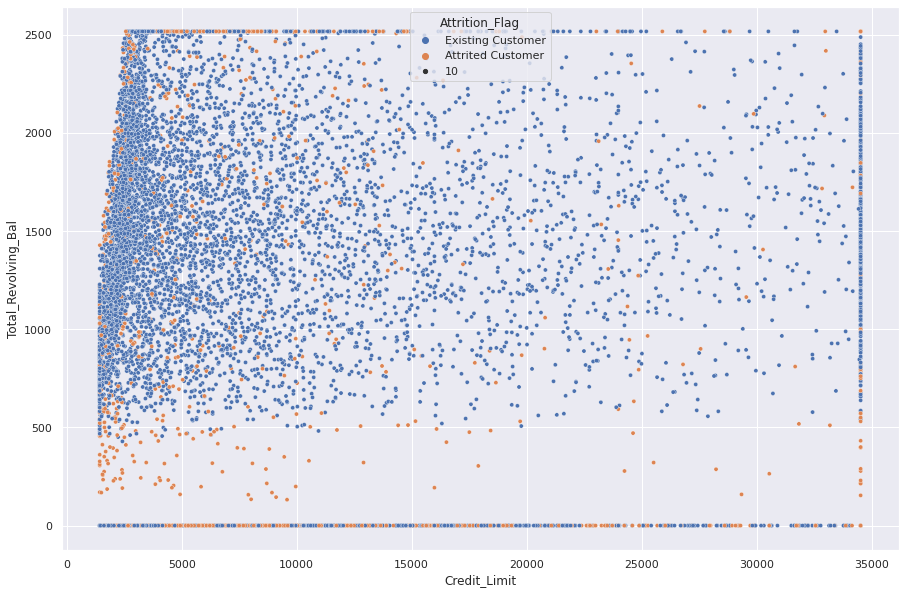

In [80]:
tam2 = sns.set(rc = {'figure.figsize':(15,10)})
ax2 = sns.scatterplot(x="Credit_Limit", y="Total_Revolving_Bal", hue="Attrition_Flag", data=bank_data, size = 10, alpha = 1)
display(ax2)

### Aquí se puede observar que los clientes que han abandonado se concentran más donde tanto el eje x como y son valores pequeños, por lo que se puede decir que mientras menor sea el limite de credito y el cupo utilizado no pagado de un cliente, mayor es la probabilidad de que abandone.

# Monto total de transacciones y Número de transacciones totales ultimos 12 meses

Haremos lo mismo que en el punto anterior, se analizará cada una en orden, y luego ambas juntas para establecer relación con el abandono de clientes.

Primero veamos la tabla de datos del monto total de transacciones.

In [85]:
#Ciclo para poder definir lista con rangos 
a = 0
b = []
for i in range(0,20):
  b.append(a)
  a+= 1000
  #if i==34:
    #a+= 100

#Agrupamos por rango de los datos de clientes que han abandonado
ranges5 = data.groupby(pd.cut(data['Total_Trans_Amt'], b)).count()
transamt_aban = ranges5[['Total_Trans_Amt']]
transamt_aban = transamt_aban.rename(columns={'Total_Trans_Amt': 'Abandonó'})


#Ahora de los que siguen
ranges6 = data2.groupby(pd.cut(data2['Total_Trans_Amt'], b)).count()
transamt_sigue = ranges6[['Total_Trans_Amt']]
transamt_sigue = transamt_sigue.rename(columns={'Total_Trans_Amt': 'Sigue'})

#Unimos
transamt = pd.merge(transamt_sigue, transamt_aban, on= 'Total_Trans_Amt')

#Para ver el porcentaje de abandono
por_amt_abandono = transamt['Abandonó']/(transamt['Abandonó']+transamt['Sigue'])
por_amt_abandono = por_amt_abandono.to_frame()
por_amt_abandono = por_amt_abandono.rename(columns={0: 'Porcentaje abandono'})

#Unimos
transamt = pd.merge(transamt, por_amt_abandono, on= 'Total_Trans_Amt')
transamt = transamt.dropna()

display(transamt)

,Sigue,Abandonó,Porcentaje abandono
Total_Trans_Amt,,,
"(0, 1000]",19,143,0.882716
"(1000, 2000]",1717,329,0.160802
"(2000, 3000]",877,812,0.480758
"(3000, 4000]",1357,34,0.024443
"(4000, 5000]",2899,53,0.017954
"(5000, 6000]",406,31,0.070938
"(6000, 7000]",8,17,0.680000
"(7000, 8000]",282,55,0.163205
"(8000, 9000]",173,96,0.356877


Veamos un grafico de barras para contemplar de mejor manera los datos.

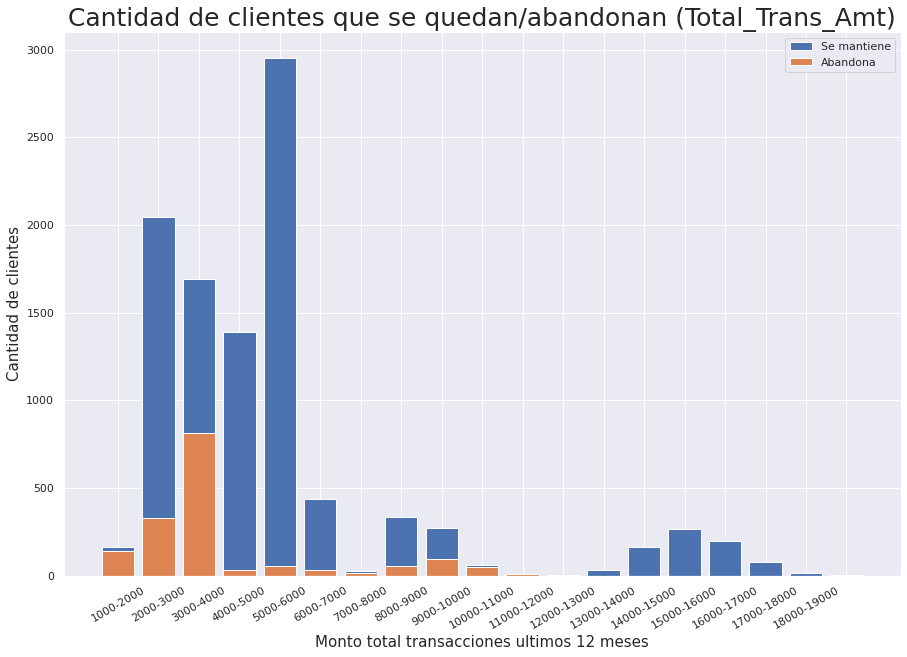

In [97]:
ejex2 = ['0-1000','1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000']

size16 = plt.figure(figsize=(15, 10))
plt.xticks(range(len(ejex2)),('1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000'), rotation=30)
tit16 = plt.title("Cantidad de clientes que se quedan/abandonan (Total_Trans_Amt)", size=25)
xtit16 = plt.xlabel("Monto total transacciones ultimos 12 meses", size=15)
ytit16 = plt.ylabel("Cantidad de clientes", size=15)
d20 = plt.bar(ejex2, transamt['Sigue'], bottom = transamt['Abandonó'], label='Se mantiene')
d21 = plt.bar(ejex2, transamt['Abandonó'], label = "Abandona")
plt.legend(loc='best')
plt.show()

### Aquí se puede observar una notoria tendencia, que los clientes que abandonan están en rangos bajos de monto de transacciones en los ultimos 12 meses. Esto quiere decir que mientras menos monto total de transaccion haya hecho un cliente en los ultimos 12 meses, mayor es la probabilidad de que abandone el banco.

Ahora veamos el gráfico de barras de los porcentajes de abandono.

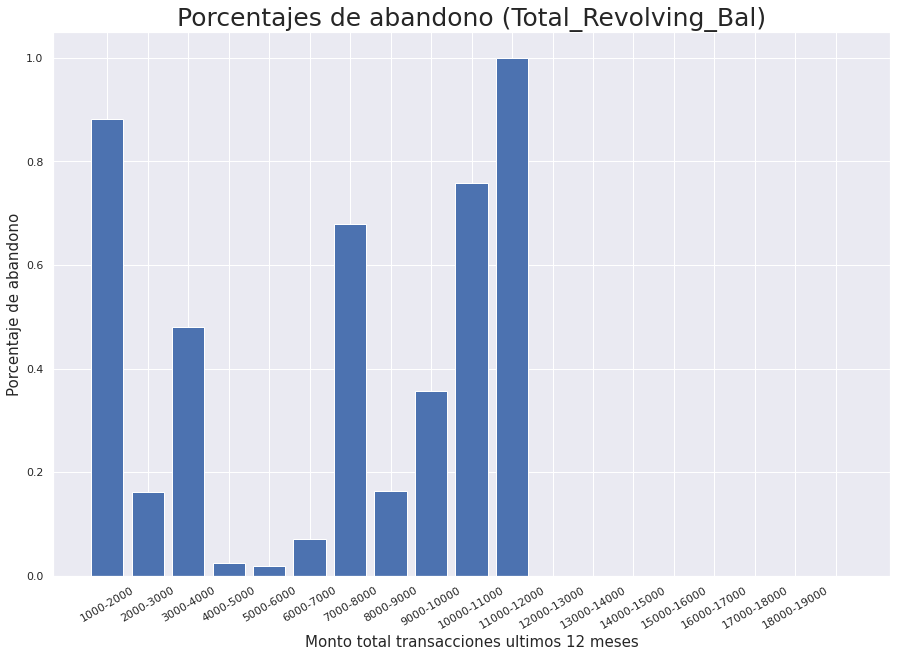

In [91]:
size17 = plt.figure(figsize=(15, 10))
plt.xticks(range(len(ejex2)),('1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000'), rotation=30)
tit17 = plt.title("Porcentajes de abandono (Total_Revolving_Bal)", size=25)
xtit17 = plt.xlabel("Monto total transacciones ultimos 12 meses", size=15)
ytit17 = plt.ylabel("Porcentaje de abandono", size=15)
d22 = plt.bar(ejex2, transamt['Porcentaje abandono'])
plt.show()

Aquí se puede comprobar lo antes dicho, y no solo que los clientes que abandonan están ubicados en los ultimos rangos, sino que también constituyen un gran porcentaje de todos los clientes dentro de los rangos. Lo cual hace ver que hay una fuerte relación de está variable con el abandono de clientes.

En el siguiente histograma se puede ver la distribución de esta variable de los clientes que sigues y que han abandonado. Esto solo comprueba lo antes dicho, ya que la distribución es notoriamente diferente. 

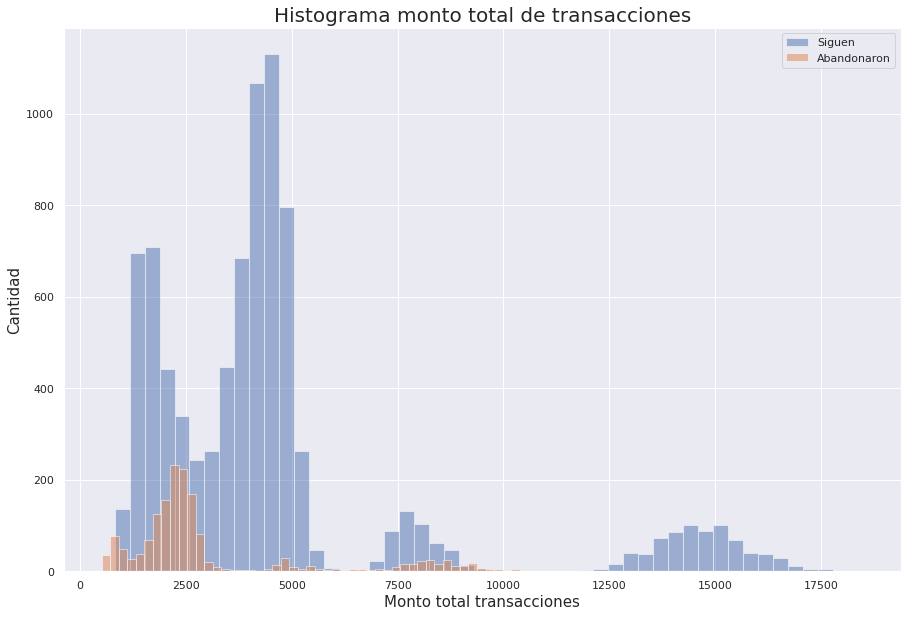

In [89]:
titaf = plt.title('Histograma monto total de transacciones', fontsize=20)
xaf = plt.xlabel('Monto total transacciones', fontsize=15)
yaf = plt.ylabel('Cantidad', fontsize=15)
graf2 = plt.hist(data2['Total_Trans_Amt'], bins=50, label='Siguen', alpha =0.5)
graf = plt.hist(data['Total_Trans_Amt'], bins=50, label='Abandonaron', alpha = 0.5)
plt.legend(loc='best')
plt.show()

Ahora veamos la otra variable, la de número de transacciones totales del cliente en los ultimos 12 meses.

Histograma con la distribución de datos. 

Al ser tantos datos, veamos inmediatamente un histograma de distribución para ver si pasa algo similar a la variable anterior.

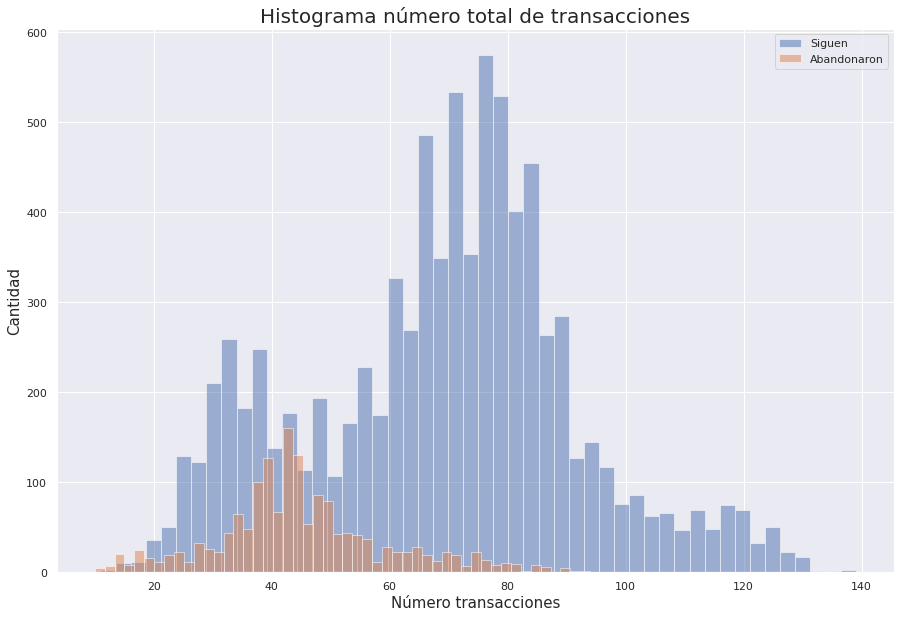

In [94]:
titaf2 = plt.title('Histograma número total de transacciones', fontsize=20)
xaf2 = plt.xlabel('Número transacciones', fontsize=15)
yaf2 = plt.ylabel('Cantidad', fontsize=15)
graf3 = plt.hist(data2['Total_Trans_Ct'], bins=50, label='Siguen', alpha =0.5)
graf4 = plt.hist(data['Total_Trans_Ct'], bins=50, label='Abandonaron', alpha = 0.5)
plt.legend(loc='best')
plt.show()

### Aquí se puede ver que la tendencia es la misma e igual de marcada a la variable de monto total. Aquí se puede aseverar que mientras menos número de transacciones haya hecho un cliente en los ultimos 12 meses, mayor es la probabilidad de que abandone.

Ahora veamos si hay una relación entre ambas variables y el abandono de un cliente.

Para esto se hace un grafico de dispersión.

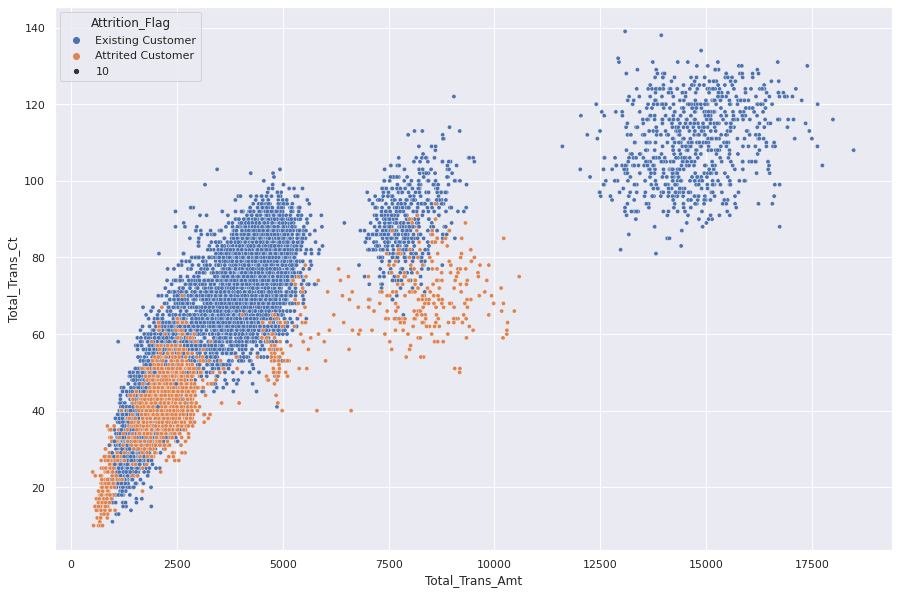

In [96]:
tam2 = sns.set(rc = {'figure.figsize':(15,10)})
ax2 = sns.scatterplot(x="Total_Trans_Amt", y="Total_Trans_Ct", hue="Attrition_Flag", data=bank_data, size = 10, alpha = 1)
display(ax2)

# Aquí se ve claramente una relación, que mientras menor sea el monto total de transacciones y el número total de estas en los ultimos 12 meses, mayor es la probabilidad de que el cliente abandonde el banco en un futuro. Está es la relación más fuerte encontrada de las variables analizadas.